# Pandas 기초

Pandas는 데이터를 빠르게 처리하기 위한 도구중 하나이다.  
Matplotlib 라이브러리와 잘 통합되어 데이터를 분석하는데 유용하다.

In [112]:
import pandas as pd

## Series( )

모든 목록, 튜플, 딕셔너리는 series 메소드를 사용하여 변환할수 있다.  
튜플변환에서 인덱스는 0,1,2 .. 로 설정된다.

In [2]:
# 튜플 타입을 변환
h = ('AA', '2012-02-01', 100, 10.2)
s = pd.Series(h)

type(s)
print(s)

0            AA
1    2012-02-01
2           100
3          10.2
dtype: object


In [5]:
# dictionary 타입을 변환
d = {'name' : 'IBM',
     'date' : '2010-09-08', 
     'shares' : 100, 
     'price' : 10.2
    }
ds = pd.Series(d)

type(ds)
print(ds)

name             IBM
date      2010-09-08
shares           100
price           10.2
dtype: object


In [8]:
# list 타입을 변환
f = ['FB', '2001-08-02', 90 ,3.2]
f = pd.Series(f, index = ['name', 'date', 'shares', 'price'])

print(f)

name              FB
date      2001-08-02
shares            90
price            3.2
dtype: object


* 인덱스의 이름을 통해서 접근할 수 있다.

In [10]:
f['shares']

90

In [11]:
f[0]

'FB'

In [12]:
f[['shares', 'price']]

shares     90
price     3.2
dtype: object

### DataFrame

dataframe은 pandas에서 널리 사용되는 데이터 구조이다.  
2차원 배열과 함께 사용할 수 있다.  
dataframe 에는 '행 인덱스'와 '열 인덱스' 가 있다.  
dataframe을 생성하는 가장 일반적인 방법은 목록 딕셔너리를 사용하는 것이다.  

In [14]:
data = {
    'name' : ['AA', 'IBM', 'GOOG'],
    'date' : ['2001-12-01', '2012-02-10', '2010-04-09'],
    'shares' : [100, 30, 90],
    'price' : [12.3, 10.3, 32.2]
}
df = pd.DataFrame(data)
type(df)

pandas.core.frame.DataFrame

In [15]:
df

,name,date,shares,price
0,AA,2001-12-01,100,12.3
1,IBM,2012-02-10,30,10.3
2,GOOG,2010-04-09,90,32.2


이후 열을 추가할 수 있다.

In [16]:
df['owner'] = 'Unknown'
df

,name,date,shares,price,owner
0,AA,2001-12-01,100,12.3,Unknown
1,IBM,2012-02-10,30,10.3,Unknown
2,GOOG,2010-04-09,90,32.2,Unknown


0, 1, 2 로 설정된 행 인덱스를 변경

In [17]:
df.index = ['one', 'two', 'three']
df

,name,date,shares,price,owner
one,AA,2001-12-01,100,12.3,Unknown
two,IBM,2012-02-10,30,10.3,Unknown
three,GOOG,2010-04-09,90,32.2,Unknown


* set_index( ) 를 사용하여 'name'을 인덱스로 설정

In [18]:
df = df.set_index(['name'])
df

,date,shares,price,owner
name,,,,
AA,2001-12-01,100,12.3,Unknown
IBM,2012-02-10,30,10.3,Unknown
GOOG,2010-04-09,90,32.2,Unknown


* shares 인덱스에 접근

In [19]:
df['shares']

name
AA      100
IBM      30
GOOG     90
Name: shares, dtype: int64

* .loc[ ] : 행과 열의 요소를 이용하여 접근

In [45]:
df.loc['AA']

date      2001-12-01
shares           100
price           12.3
owner        Unknown
Name: AA, dtype: object

In [46]:
df.loc['AA', 'price']

12.3

* .iloc[ ] : 행과 열의 위치를 이용하여 접근

In [48]:
# 행과 열의 위치로 접근
df.iloc[1]

date      2012-02-10
shares            30
price           10.3
owner        Unknown
Name: IBM, dtype: object

In [49]:
df.iloc[1, 2]

10.3

### del drop 을 이용하여 삭제

In [50]:
del df['owner']
df

,date,shares,price
name,,,
AA,2001-12-01,100,12.3
IBM,2012-02-10,30,10.3
GOOG,2010-04-09,90,32.2


In [51]:
df.drop('shares', axis = 1)
df

,date,shares,price
name,,,
AA,2001-12-01,100,12.3
IBM,2012-02-10,30,10.3
GOOG,2010-04-09,90,32.2


## Overview

### 파일 읽기

In [54]:
casts = pd.read_csv('./pythondsp-pandasguide-b936c3b43406/data/cast.csv',
                    index_col=None, encoding='utf-8')
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


* read_csv : csv 파일의 데이터를 읽는다.
* index_col=None : 인덱스가 None. 첫번째 열이 인덱스가 된다.
* head( ) : Dataframe의 처음 5개 요소 표시
* tail( ) : Dataframe의 마지막 5개 요소 표시

In [82]:
casts

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [80]:
titles = pd.read_csv('./pythondsp-pandasguide-b936c3b43406/data/cast.csv',
                    index_col=None, encoding='utf-8')

In [81]:
# 파일을 요약하여 표시
pd.set_option('max_rows', 10, 'max_columns', 10)
titles


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [88]:
pd.options.display.max_rows=20
pd.options.display.min_rows=20     # 전체는 None 
titles

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Data operations

In [134]:
t = titles['title']
type(t)

pandas.core.series.Series

In [90]:
t.head()

0          Closet Monster
1         Suuri illusioni
2     Battle of the Sexes
3    Secret in Their Eyes
4              Steve Jobs
Name: title, dtype: object

In [91]:
titles.iloc[0]

title        Closet Monster
year                   2015
name               Buffy #1
type                  actor
character           Buffy 4
n                        31
Name: 0, dtype: object

### Filter data

dataframe 에서 일부 bool표현식을 이용하여 데이터를 필터링 할 수 있다.

In [92]:
after85 = titles[titles['year']>1985]
after85.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


* True 를 표시하는 대신에 해당하는 모든 결과를 표시한다.
* & 와 | 는 두 조건을 결합하는데 사용할 수 있다.

In [133]:
t = titles
movies90 = t[(t['year']>=1990) & (t['year']<2000)]
movies90.head()

,title,year,name,type,character,n
12,Mixing Nia,1998,Michael 'babeepower' Viera,actor,Rapper,NaN
19,Mariano Mison... NBI,1997,Joseph 'Byron' Sese,actor,Putik's Son,31.0
31,Pelotazo nacional,1993,F?lix 'El Gato',actor,Rebolledo,12.0
38,Killing Device,1993,Van 'Igor' Morrison,actor,Jeep Driver,51.0
44,Violencia urbana,1996,N?stor 'Kick Boxer',actor,Monta?a,21.0


In [94]:
macbeth = t[t['title'] == 'Macbeth']
macbeth.head()

,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0


### Sorting

sort_index 또는 sort_values 를 사용하여 정렬할 수 있다.

In [95]:
macbeth = t[t['title'] == 'Macbeth'].sort_index()
macbeth.head()

,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0


In [96]:
macbeth = t[t['title'] == 'Macbeth'].sort_values('year')
macbeth.head()

,title,year,name,type,character,n
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0
40639,Macbeth,1997,Stevie Allen,actor,Murderer,21.0


### Null values

In [98]:
casts.loc[3:4]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### isnull( ) : null 값이 있는 경우 True를 반환

In [99]:
c = casts
c['n'].isnull().head()

0    False
1    False
2    False
3     True
4     True
Name: n, dtype: bool

### notnull( ) : null이 아닌 값에 True를 반환

In [102]:
c['n'].notnull().head()

0     True
1     True
2     True
3    False
4    False
Name: n, dtype: bool

In [104]:
c[c['n'].isnull()].head(3)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [106]:
c_fill = c[c['n'].isnull()].fillna('NA')
c_fill.head(2)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NA
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NA


In [117]:
import numpy as np

In [120]:
df = pd.DataFrame(dict(age = [np.NaN, np.NaN, 6],
                      born = [pd.NaT, pd.Timestamp('1939-05-27'), pd.Timestamp('1940-04-25')],
                      name = [np.NaN, 'Batman', ''],
                      toy = [None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,NaN,NaT,NaN,None
1,NaN,1939-05-27,Batman,Batmobile
2,6.0,1940-04-25,,Joker


### info( )

데이터의 개략적인 정보를 파악하는데 유용하다.

In [121]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     1 non-null      float64       
 1   born    2 non-null      datetime64[ns]
 2   name    2 non-null      object        
 3   toy     2 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 224.0+ bytes


In [122]:
df[df.age.isna()]

,age,born,name,toy
0,NaN,NaT,NaN,None
1,NaN,1939-05-27,Batman,Batmobile


In [123]:
df[df.age.notna()]

,age,born,name,toy
2,6.0,1940-04-25,,Joker


In [124]:
df.dropna()

,age,born,name,toy
2,6.0,1940-04-25,,Joker


In [125]:
df.dropna(subset=['age'])

,age,born,name,toy
2,6.0,1940-04-25,,Joker


In [126]:
df.dropna(axis=1)

""
0
1
2


In [127]:
df.dropna(inplace=True)

In [128]:
df[df.age.notna()].reset_index()

,index,age,born,name,toy
0,2,6.0,1940-04-25,,Joker


In [129]:
df[df.age.notna()].reset_index(drop=True)

,age,born,name,toy
0,6.0,1940-04-25,,Joker


In [130]:
df.age = df.age.fillna(0)
df

,age,born,name,toy
2,6.0,1940-04-25,,Joker


In [131]:
df.fillna(method='bfill')

,age,born,name,toy
2,6.0,1940-04-25,,Joker


### string operations

'.str' 옵션을 이용하여 문자열 연산을 수행할 수 있다.

In [141]:
t = titles
t[t['title'] == 'Macbeth']

,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0
40639,Macbeth,1997,Stevie Allen,actor,Murderer,21.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [139]:
t[t['title'].str.startswith("Maa")].head(3)

,title,year,name,type,character,n
1489,Maaro,2011,Abbas (VIII),actor,Second Hero,NaN
6695,Maarek hob,2004,Robert Abyad,actor,Cr?ancier 1,NaN
17319,Maalik,2016,Farhan Ally Agha,actor,Major Haider,2.0


### value_counts( )

value_counts( ) 를 사용하여 총 발생 횟수를 계산 할 수 있다.

In [194]:
t['year'].value_counts().head()

2016    3841
2015    3439
2014    3309
2013    3110
2012    3011
Name: year, dtype: int64

### matplot 라이브러리를 이용한 시각화

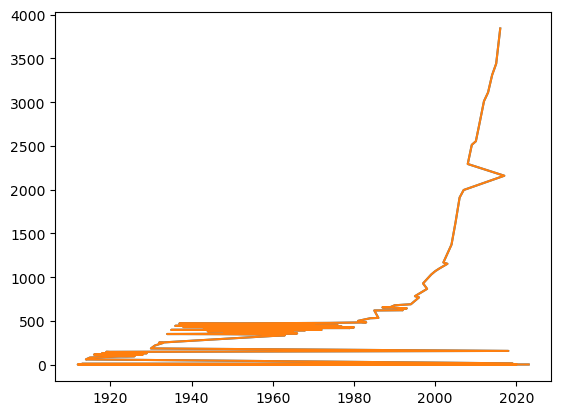

In [197]:
import matplotlib.pyplot as plt
t = titles
p = t['year'].value_counts()
p.plot()
plt.show()

* 인덱스를 정렬한 후 플롯하는 것이 좋다.

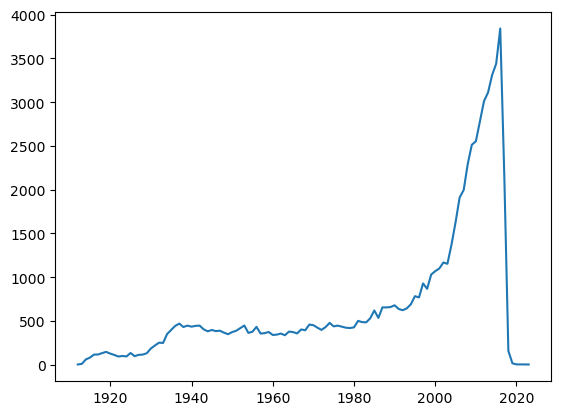

In [198]:
# 자료 정렬
p.sort_index().plot()
plt.show()

## Groupby

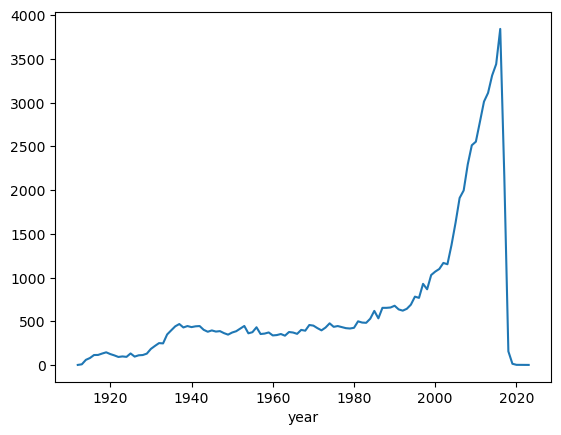

In [199]:
cg = c.groupby(['year']).size()
cg.plot()
plt.show()

In [202]:
c = casts
cf = c[c['name'] == 'Aaron Abrams']
cf.groupby(['year']).size().head

<bound method NDFrame.head of year
2003    2
2004    2
2005    2
2006    1
2007    2
2008    1
2009    2
2011    5
2013    1
2015    2
2017    2
2018    1
dtype: int64>

In [203]:
cf.groupby(['year', 'title']).size().head()

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
2004  Resident Evil: Apocalypse               1
      Siblings                                1
2005  Cinderella Man                          1
dtype: int64

In [204]:
c.groupby(['year']).n.max().head()

year
1912     6.0
1913    14.0
1914    39.0
1915    14.0
1916    35.0
Name: n, dtype: float64

In [205]:
c.groupby(['year']).n.min().head()

year
1912    6.0
1913    1.0
1914    1.0
1915    1.0
1916    1.0
Name: n, dtype: float64

In [206]:
c.groupby(['year']).n.mean().head()

year
1912    6.000000
1913    4.142857
1914    7.085106
1915    4.236111
1916    5.037736
Name: n, dtype: float64

In [207]:
decade = c['year']//10*10
c_dec = c.groupby(decade).n.size()
c_dec.head()

year
1910     669
1920    1121
1930    3448
1940    3997
1950    3892
Name: n, dtype: int64

### 문자열 처리 실습

3개의 이메일 주소

In [191]:
df1 = pd.DataFrame({'email':['happy@gmail.com', \
                            '1004@naver.com', \
                            'hello@nate.com']})
df1

,email
0,happy@gmail.com
1,1004@naver.com
2,hello@nate.com


* 공백 제거

In [178]:
df1['email_strip'] = df1['email'].str.strip()  # 앞 뒤 공백 제거
df1['email_lstrip'] = df1['email'].str.lstrip()  # 앞 공백 제거
df1['email_rstrip'] = df1['email'].str.rstrip()  # 뒤 공백 제거

df1


,email,email_strip,email_lstrip,email_rstrip
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com
1,1004@naver.com,1004@naver.com,1004@naver.com,1004@naver.com
2,hello@nate.com,hello@nate.com,hello@nate.com,hello@nate.com


* 고정 길이를 설정하고 나머지를 지정 문자열로 채운다

In [164]:
df1['email_pad'] = df1['email'].str.pad(width=20, side='left', fillchar='_')
df1['email_center'] = df1['email'].str.center(width=20, fillchar='_')
df1['email_ljust'] = df1['email'].str.ljust(width=20, fillchar='_')
df1['email_rjust'] = df1['email'].str.rjust(width=20, fillchar='_')
df1['email_zfill'] = df1['email'].str.zfill(width=20)
df1

,email,email_pad,email_center,email_ljust,email_rjust,email_zfill
0,happy@gmail.com,_____happy@gmail.com,__happy@gmail.com___,happy@gmail.com_____,_____happy@gmail.com,00000happy@gmail.com
1,1004@naver.com,______1004@naver.com,___1004@naver.com___,1004@naver.com______,______1004@naver.com,0000001004@naver.com
2,hello@nate.com,______hello@nate.com,___hello@nate.com___,hello@nate.com______,______hello@nate.com,000000hello@nate.com


* 분할하여 새로운 컬럼 생성

In [175]:
df1[['email_split_1', 'email_split_2']] = df1['email'].str.split('@', n=1, expand=True)
df1[['email_partition_1', 'email_partition_2', 'email_partition_3']] = df1['email'].str.partition(sep='@')
df1[['email_rpartition_1', 'email_rpartition_2', 'email_rpartition_3']] = df1['email'].str.partition(sep='@')
df1['email_rsplit_1'] = df1['email'].str.rsplit(pat='@')

df1

,email,email_split_1,email_split_2,email_partition_1,email_partition_2,email_partition_3,email_rpartition_1,email_rpartition_2,email_rpartition_3,email_rsplit_1
0,happy@gmail.com,happy,gmail.com,happy,@,gmail.com,happy,@,gmail.com,"[happy, gmail.com]"
1,1004@naver.com,1004,naver.com,1004,@,naver.com,1004,@,naver.com,"[1004, naver.com]"
2,hello@nate.com,hello,nate.com,hello,@,nate.com,hello,@,nate.com,"[hello, nate.com]"


In [181]:
# 모두 소문자로 변경
df1['email_lower']      = df1['email'].str.lower()      

# 모두 대문자로 변경
df1['email_upper']      = df1['email'].str.upper()      

# 앞문자 대문자로 변경
df1['email_capitalize'] = df1['email'].str.capitalize() 

# 단위별 앞문자 대문자로 변경
df1['email_title']      = df1['email'].str.title()      

# 소문자는 대문자, 대문자는 소문자로 변경 
df1['email_swapcase']   = df1['email'].str.swapcase()   
df1

,email,email_lower,email_upper,email_capitalize,email_title,email_swapcase
0,happy@gmail.com,happy@gmail.com,HAPPY@GMAIL.COM,Happy@gmail.com,Happy@Gmail.Com,HAPPY@GMAIL.COM
1,1004@naver.com,1004@naver.com,1004@NAVER.COM,1004@naver.com,1004@Naver.Com,1004@NAVER.COM
2,hello@nate.com,hello@nate.com,HELLO@NATE.COM,Hello@nate.com,Hello@Nate.Com,HELLO@NATE.COM


In [184]:
# 왼쪽부터 sub값 검색후 위치반환
df1['email_find']    = df1['email'].str.find(sub='.')        

# 찾은 모든 값 반환
df1['email_findall'] = df1['email'].str.findall(pat='[a-zA-Z]') 

# 오른쪽부터 sub값 검색후 위치반환
df1['email_rfind']   = df1['email'].str.rfind(sub='.')          

# 왼쪽부터 sub값 검색후 위치반환
df1['email_index']   = df1['email'].str.index(sub='.')          

# 오른쪽부터 sub값 검색후 위치반환
df1['email_rindex']  = df1['email'].str.rindex(sub='.')        
df1

,email,email_find,email_findall,email_rfind,email_index,email_rindex
0,happy@gmail.com,11,"[h, a, p, p, y, g, m, a, i, l, c, o, m]",11,11,11
1,1004@naver.com,10,"[n, a, v, e, r, c, o, m]",10,10,10
2,hello@nate.com,10,"[h, e, l, l, o, n, a, t, e, c, o, m]",10,10,10


In [188]:
# 지정 위치값 반환
df1['email_get'] = df1['email'].str.get(i=0)    

# 인덱스 사이 값 반환
df1['email_slice'] = df1['email'].str.slice(start=0, stop=5) 

# 인덱스 사이 값을 다른 값으로 바꾼 후 값 반환
df1['email_slice_replace'] = df1['email'].str.slice_replace(start=0, stop=5, repl='?')
df1

,email,email_get,email_slice,email_slice_replace
0,happy@gmail.com,h,happy,?@gmail.com
1,1004@naver.com,1,1004@,?naver.com
2,hello@nate.com,h,hello,?@nate.com


In [190]:
# 길이 반환
df1['email_len']   = df1['email'].str.len()              

# 문자열 중 패턴에 일치한 수 반환
df1['email_count'] = df1['email'].str.count(pat='[0-9]')

In [193]:
# 알파벳 또는 숫자로만 구성 여부
df1['email_isalnum']   = df1['email'].str.isalnum()   

# 알파벳으로만 구성 여부
df1['email_isalpha']   = df1['email'].str.isalpha()   

# 숫자문자로만 구성 여부
df1['email_isdecimal'] = df1['email'].str.isdecimal() 

# 숫자문자로만 구성 여부
df1['email_isdigit']   = df1['email'].str.isdigit()   

# 소문자로만 구성 여부
df1['email_islower']   = df1['email'].str.islower()   

# 숫자문자로만 구성 여부
df1['email_isnumeric'] = df1['email'].str.isnumeric() 

# 공백(Whitespace)으로만 구성 여부
df1['email_isspace']   = df1['email'].str.isspace()   

# TitleCase형태로 구성 여부
df1['email_istitle']   = df1['email'].str.istitle()   

# 대문자로만 구성 여부
df1['email_isupper']   = df1['email'].str.isupper()  
df1

,email,email_isalnum,email_isalpha,email_isdecimal,email_isdigit,email_islower,email_isnumeric,email_isspace,email_istitle,email_isupper
0,happy@gmail.com,False,False,False,False,True,False,False,False,False
1,1004@naver.com,False,False,False,False,True,False,False,False,False
2,hello@nate.com,False,False,False,False,True,False,False,False,False
